<a href="https://colab.research.google.com/github/thanusree45/CROPYIELD-AREAS-PROJECT/blob/main/crop_yield_areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CROP YIELD AREAS PROJECT

In [ ]:
import pandas as pd  #import packages
import matplotlib.pyplot as plt
import seaborn as sns
ds=pd.read_csv("crop_yield.csv") #open dataset
ds.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
ds.describe() #description of dataset

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
ds.info() #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
ds['Crop'].nunique() #crops

55

In [ ]:
ds['State'].nunique() #states

30

In [ ]:
ds['Crop_Year'].nunique() #years

24

In [ ]:
# LINEPLOT BETWEEN CROP YEAR AND YIELD

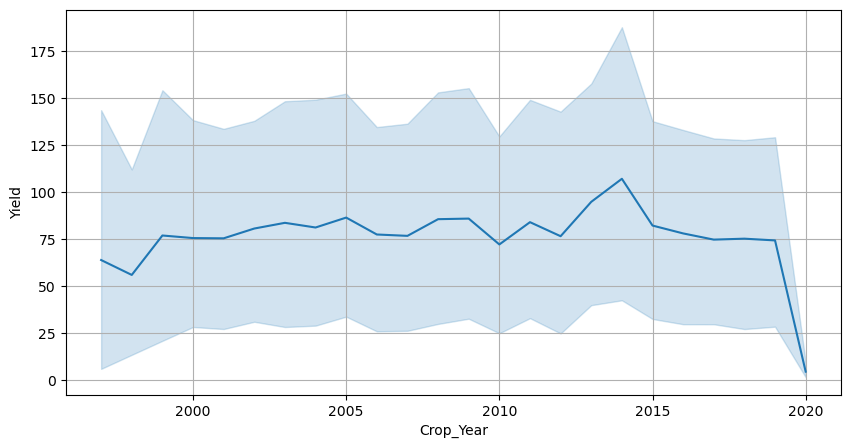

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Crop_Year',y='Yield',data=ds)
plt.grid(True)
plt.show()

In [ ]:
# BARGRAPH BETWEEN CROP AND PRODUCTION

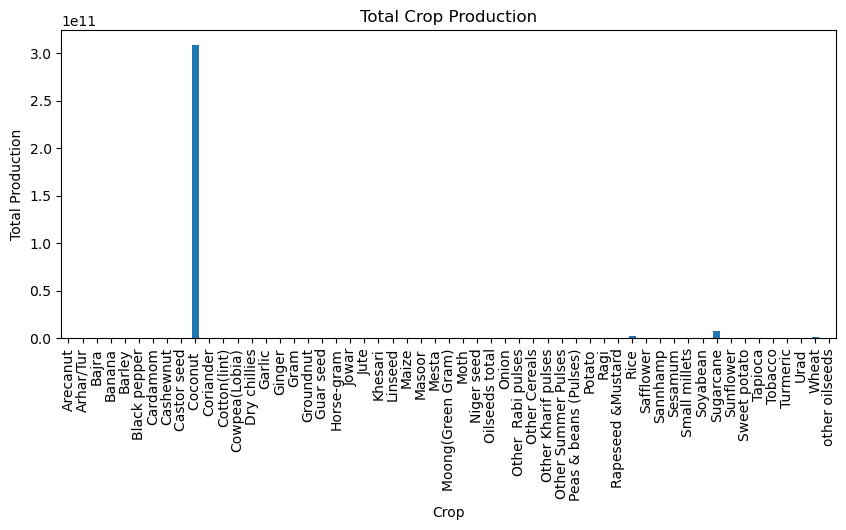

In [ ]:
plt.figure(figsize=(10,4))
crop_production = ds.groupby('Crop')['Production'].sum()
crop_production.plot(kind='bar')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Total Crop Production')
plt.show()

In [ ]:
# HEATMAP TO ANALYSE CORRELATION BETWEEN ALL ATTRIBUTES

C:\Users\REDDY\AppData\Local\Temp\ipykernel_13568\3497809993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),annot=True)


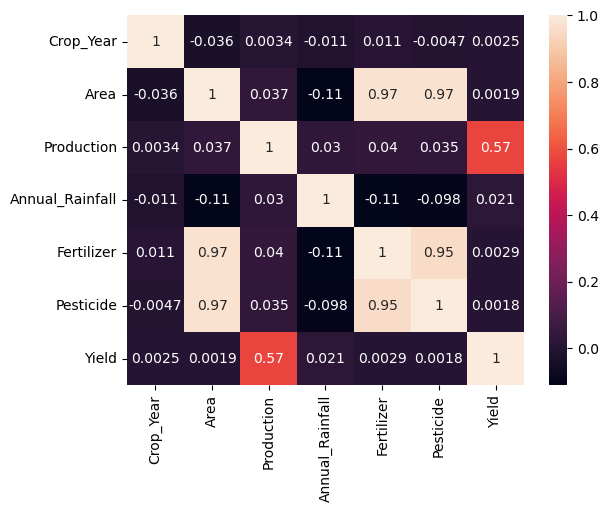

In [ ]:
sns.heatmap(ds.corr(),annot=True)
plt.show()

In [ ]:
# BARPLOT STATE AND YIELD

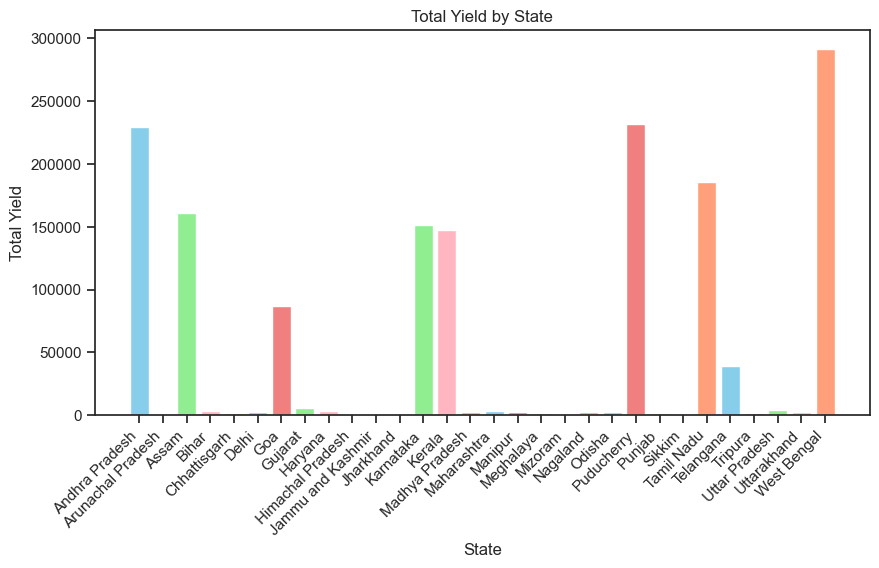

In [ ]:
yield_by_state = ds.groupby('State')['Yield'].sum().reset_index()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon']

plt.figure(figsize=(10, 5))
plt.bar(yield_by_state['State'], yield_by_state['Yield'], color=colors)

plt.xlabel('State')
plt.ylabel('Total Yield')
plt.title('Total Yield by State')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# GRID PLOT BETWEEN YEAR AND RAINFALL

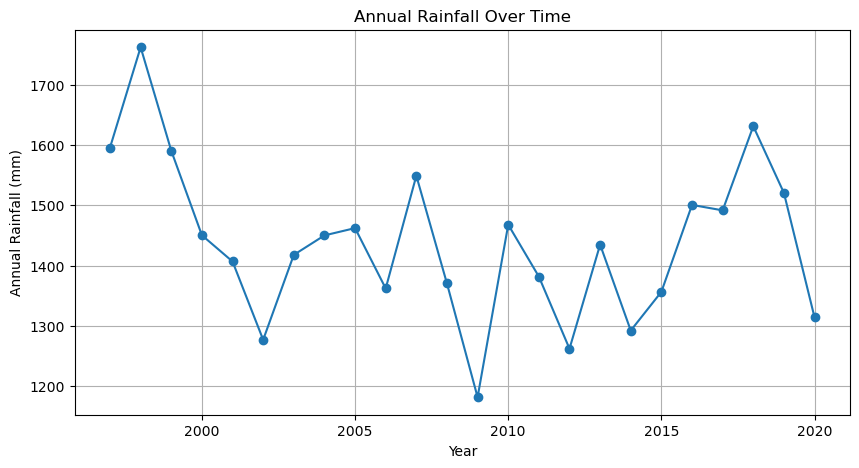

In [ ]:
yearly_rainfall = ds.groupby('Crop_Year')['Annual_Rainfall'].mean()
plt.figure(figsize=(10, 5))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall(mm)')
plt.title('Annual Rainfall Over Time')
plt.grid(True)
plt.show()

In [ ]:
# SCATTERPLOT BETWEEN CROP YIELD AND RAINFALL

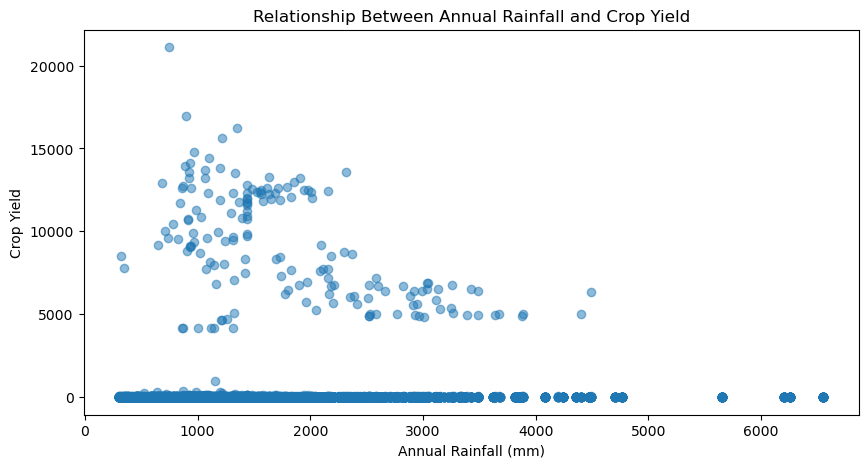

In [ ]:
annual_rainfall = ds['Annual_Rainfall']
crop_yield = ds['Yield']
plt.figure(figsize=(10, 5))
plt.scatter(annual_rainfall, crop_yield, alpha=0.5)
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.title('Relationship Between Annual Rainfall and Crop Yield')
plt.show()

In [ ]:
# GRID PLOT BETWEEN CROP AND YIELD

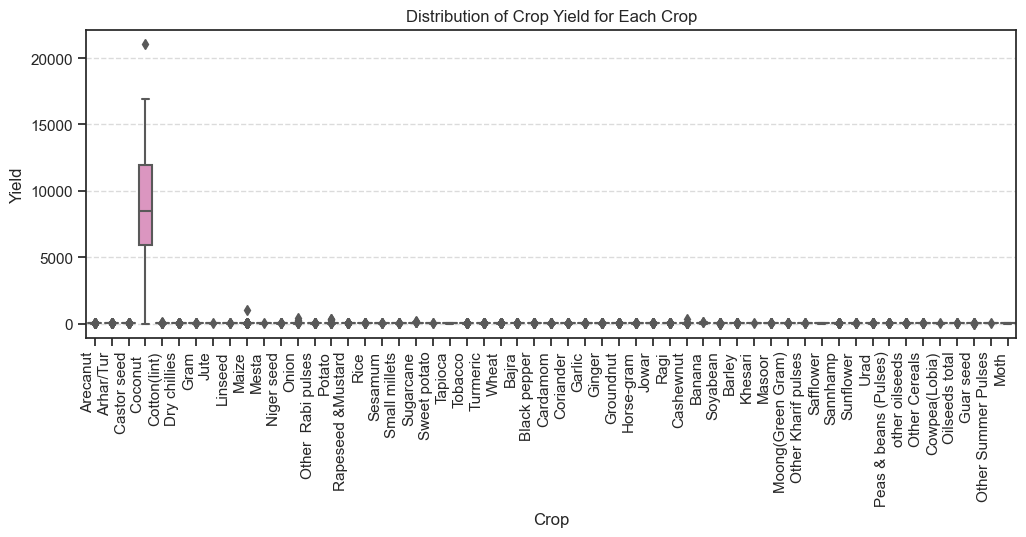

In [ ]:
crops = ds['Crop']
crop_yield = ds['Yield']
plt.figure(figsize=(12, 4))
sns.boxplot(x=crops, y=crop_yield, palette='Set2')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.title('Distribution of Crop Yield for Each Crop')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# PAIRPLOT FOR ANALYSING ALL ATTRIBUTES

<Figure size 1000x500 with 0 Axes>

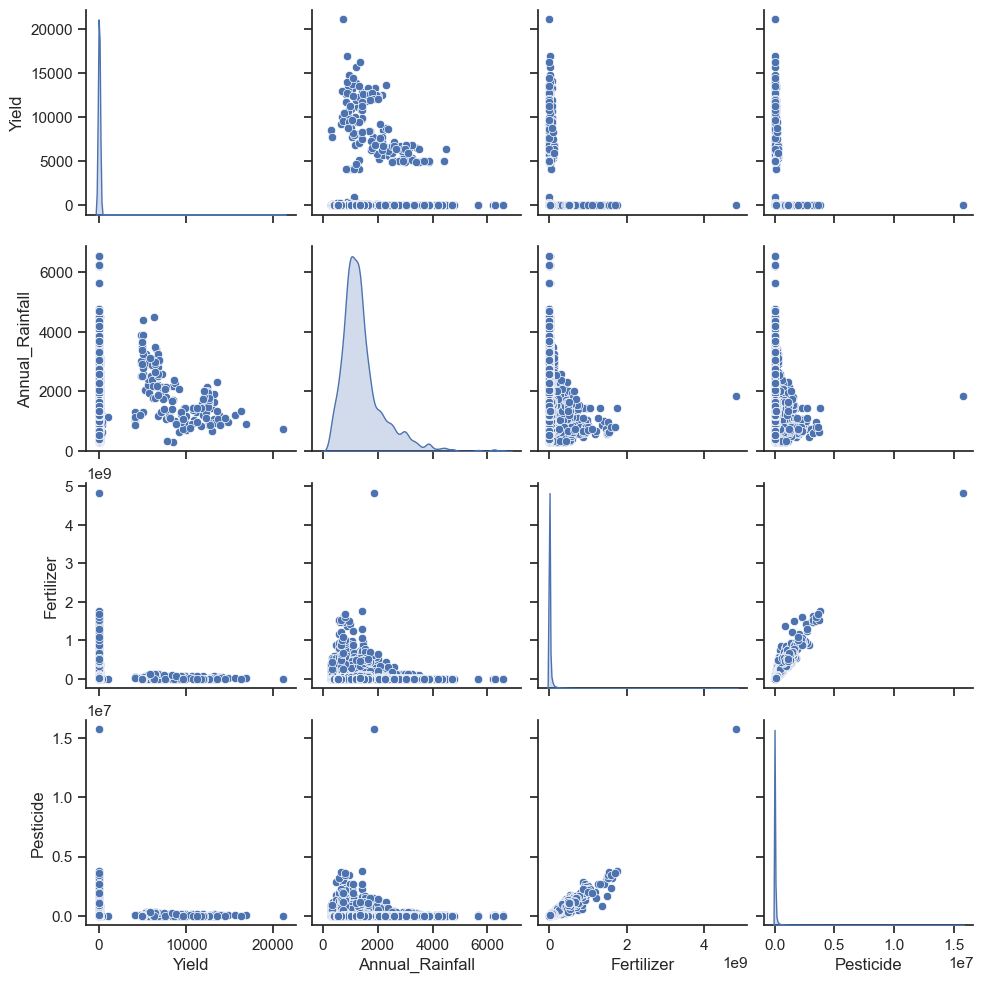

In [ ]:
attributes = ['Yield', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
plt.figure(figsize=(10, 5))
sns.set(style="ticks")
sns.pairplot(ds[attributes], diag_kind='kde')
plt.show()